# 로지스틱회귀

* 이진분류를 위한 붓꽃 데이터 준비

In [10]:
from sklearn.datasets import load_iris
import numpy as np

iris = load_iris()
list(iris.keys())

X = iris['data'][:, 3:] # 꽃잎의 너비 (2D)
y = (iris['target'] == 2).astype(np.int32)
print(X.shape, y.shape)

import pandas as pd
print(pd.Series(y).value_counts())

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=42)
# print(pd.Series(y_train).value_counts())
# print(pd.Series(y_test).value_counts())

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y) # 비율을 유지하도록
print(pd.Series(y_train).value_counts())
print(pd.Series(y_test).value_counts())

(150, 1) (150,)
0    100
1     50
dtype: int64
0    80
1    40
dtype: int64
0    20
1    10
dtype: int64


In [2]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [13]:
from sklearn.preprocessing import StandardScaler
zs = StandardScaler()
X_train_zs = zs.fit_transform(X_train)
X_test_zs = zs.transform(X_test)

In [14]:
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression()
log_clf.fit(X_train_zs, y_train)

LogisticRegression()

In [15]:
print(log_clf.score(X_train_zs, y_train))
print(log_clf.score(X_test_zs, y_test)) # 정확도

0.9583333333333334
0.9666666666666667


In [17]:
from sklearn.metrics import accuracy_score
y_pred = log_clf.predict(X_test_zs)
accuracy_score(y_test, y_pred)

0.9666666666666667

In [20]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_clf.predict_proba(X_new)
y_proba.shape

(1000, 2)

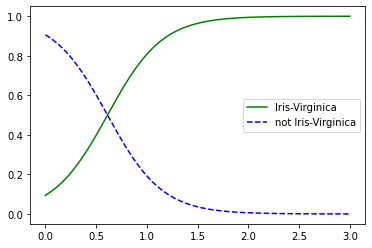

In [24]:
import matplotlib.pyplot as plt
plt.plot(X_new, y_proba[:, 1], 'g-', label='Iris-Virginica')
plt.plot(X_new, y_proba[:, 0], 'b--', label='not Iris-Virginica')
plt.legend(loc='best')

꽃잎의 너비 중 Virginica의 결정 경계를 구하기 위하여 특성스케일링 안 한 데이터 사용

In [25]:
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression()
log_clf.fit(X_train, y_train)

LogisticRegression()

In [26]:
log_clf.score(X_train, y_train)

0.9583333333333334

In [27]:
log_clf.score(X_test, y_test)

0.9666666666666667

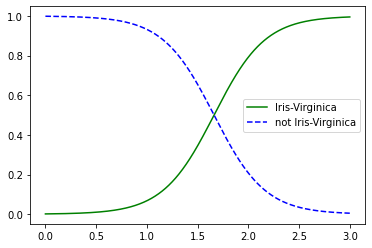

In [29]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_clf.predict_proba(X_new)
import matplotlib.pyplot as plt
plt.plot(X_new, y_proba[:, 1], 'g-', label='Iris-Virginica')
plt.plot(X_new, y_proba[:, 0], 'b--', label='not Iris-Virginica')
plt.legend(loc='best')

In [34]:
log_clf.predict([[1.7], [1.5], [1.6]])

array([1, 0, 0])

# 다항 분류에 로지스틱 회귀를 활용

In [36]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris['data'][:, [2, 3]] # 꽃잎의 길이와 너비
y = iris['target']

In [37]:
from sklearn.linear_model import LogisticRegression
softmax_clf = LogisticRegression(multi_class='multinomial', 
                                 solver='lbfgs', 
                                C=10)
softmax_clf.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')

In [38]:
softmax_clf.predict([[5, 2]])

array([2])

In [39]:
softmax_clf.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

In [40]:
LogisticRegression?

## 교차검증:
* 전체 데이터를 k겹의 서브셋으로 나누어 각각을 시험용으로 사용하고 나머지를 훈련용으로 사용하여 평가지표를 집계하는 평가방식

In [46]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(softmax_clf, X, y, cv=5, scoring='accuracy')
print(scores)
print(scores.mean())

[0.96666667 0.96666667 0.93333333 0.93333333 1.        ]
0.96


In [47]:
from sklearn import model_selection
model_selection.cross*?

## 파이프라인 도구 (수치형, 범주형 각각 처리 후 연결)
* 여러 단계의 전처리 프로세스를 연결해주는 도구
* 각 단계에서 입력을 받은 데이터를 변환하여 다음 단계로 출력함
* fit()과 transform()메소드를 사용할 수 있는 객체 (변환기, 예로써는 StandardScaler)는 파이프라인 중 어디나 배치될 수 있음.
* fit() 메소드를 사용할 수 있는 객체 (추정기, 예로써는 LogisticRegression)는 파이프라인 중 끝에만 배치될 수 있음.

In [51]:
class DataFrameSelector():
    def __init__(self, attribs):
        self.attribs = attribs
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return X.loc[:, self.attribs] ### 의미있는 변환을 하는 부분
    
    def fit_transform(self, X, y=None):
        return self.transform(X, y)

In [56]:
Pipeline?

In [52]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

housing = pd.read_csv('datasets/housing.csv')
X = housing.drop(columns=['median_house_value'], axis='columns')
y = housing['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

num_columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']
cat_columns = ['ocean_proximity']

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_columns)),
        ('imputer', KNNImputer(n_neighbors=7)),
        ('scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_columns)),
        ('one_hot_encoder', OneHotEncoder(sparse=False, handle_unknown='ignore')),
])

full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline),
])

full_pipeline.fit(X_train)
X_train_prep = full_pipeline.transform(X_train)
X_test_prep = full_pipeline.transform(X_test)

In [53]:
print(X_train_prep.shape, y_train.shape, X_test_prep.shape, y_test.shape)

(16512, 13) (16512,) (4128, 13) (4128,)


In [59]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=1, max_iter=5000)
lasso_reg.fit(X_train_prep, y_train)

Lasso(alpha=1, max_iter=5000)

In [60]:
print(lasso_reg.score(X_train_prep, y_train))
print(lasso_reg.score(X_test_prep, y_test))

0.6459923781313412
0.6484732156129229


## 최적의 파라미터 조합을 탐색, GridSearchCV

In [66]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = [
    {'n_estimators':[3, 10, 30], 'max_features':[2, 4, 6, 8]},
    {'bootstrap':[False], 'n_estimators':[3, 10], 'max_features':[2, 3, 4]},
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, 
                param_grid, cv=5, scoring='neg_mean_squared_error') ### 회귀
grid_search.fit(X_train_prep, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             scoring='neg_mean_squared_error')

In [67]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [68]:
import pandas as pd
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.074484,0.007602,0.004395,0.000810,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-4.464816e+09,-3.784007e+09,-3.999698e+09,-3.976130e+09,-4.068351e+09,-4.058600e+09,2.239547e+08,18
1,0.245084,0.020810,0.013362,0.002324,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-3.216531e+09,-3.075168e+09,-2.896244e+09,-3.107236e+09,-2.890432e+09,-3.037122e+09,1.264243e+08,11
2,0.771038,0.062424,0.037722,0.003187,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-3.038309e+09,-2.723127e+09,-2.644966e+09,-2.763264e+09,-2.510524e+09,-2.736038e+09,1.740267e+08,7
3,0.158180,0.015650,0.004788,0.000399,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-4.029584e+09,-3.674806e+09,-3.410060e+09,-3.913048e+09,-3.634747e+09,-3.732449e+09,2.180405e+08,16
4,0.454041,0.081271,0.014560,0.003064,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-3.100587e+09,-2.790243e+09,-2.791546e+09,-2.706566e+09,-2.514183e+09,-2.780625e+09,1.892425e+08,8
5,1.192808,0.089443,0.035513,0.003361,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.812986e+09,-2.485312e+09,-2.497938e+09,-2.504172e+09,-2.299334e+09,-2.519949e+09,1.652120e+08,3
6,0.172307,0.011844,0.004788,0.000748,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.701429e+09,-3.513380e+09,-3.458982e+09,-3.602834e+09,-3.244767e+09,-3.504278e+09,1.536633e+08,14
7,0.513369,0.054195,0.012173,0.001460,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.958494e+09,-2.634199e+09,-2.579828e+09,-2.777968e+09,-2.511211e+09,-2.692340e+09,1.593845e+08,5
8,1.562564,0.075305,0.036902,0.004324,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.792897e+09,-2.483003e+09,-2.513678e+09,-2.516497e+09,-2.239558e+09,-2.509127e+09,1.754708e+08,2
9,0.194329,0.016687,0.004786,0.000747,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.338773e+09,-3.420498e+09,-3.406703e+09,-3.256835e+09,-3.333980e+09,-3.351358e+09,5.871697e+07,13


In [70]:
rnd_reg = RandomForestRegressor(max_features=8, n_estimators=30)
rnd_reg.fit(X_train_prep, y_train)
print(rnd_reg.score(X_train_prep, y_train))
print(rnd_reg.score(X_test_prep, y_test))

RandomForestRegressor(max_features=8, n_estimators=30)

0.9719208103454772
0.8224418503670029


## 랜덤 탐색

In [72]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = [
    {'n_estimators':[3, 10, 30], 'max_features':[2, 4, 6, 8]},
    {'bootstrap':[False], 'n_estimators':[3, 10], 'max_features':[2, 3, 4]},
]

forest_reg = RandomForestRegressor()

random_search = RandomizedSearchCV(forest_reg, 
                param_grid, cv=5, scoring='neg_mean_squared_error') ### 회귀
random_search.fit(X_train_prep, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions=[{'max_features': [2, 4, 6, 8],
                                         'n_estimators': [3, 10, 30]},
                                        {'bootstrap': [False],
                                         'max_features': [2, 3, 4],
                                         'n_estimators': [3, 10]}],
                   scoring='neg_mean_squared_error')

In [73]:
random_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [74]:
import pandas as pd
pd.DataFrame(random_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_features,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.113744,0.010454,0.005984,0.000631,3,2,NaN,"{'n_estimators': 3, 'max_features': 2}",-4.196823e+09,-3.871001e+09,-3.933201e+09,-4.013316e+09,-3.723030e+09,-3.947474e+09,1.568037e+08,10
1,1.592913,0.047427,0.033317,0.002061,30,6,NaN,"{'n_estimators': 30, 'max_features': 6}",-2.792791e+09,-2.449288e+09,-2.451695e+09,-2.476381e+09,-2.214296e+09,-2.476890e+09,1.844700e+08,1
2,0.657741,0.055584,0.012163,0.001597,10,8,NaN,"{'n_estimators': 10, 'max_features': 8}",-2.943255e+09,-2.675617e+09,-2.694339e+09,-2.708686e+09,-2.429923e+09,-2.690364e+09,1.626975e+08,3
3,0.746766,0.041959,0.036503,0.002239,30,2,NaN,"{'n_estimators': 30, 'max_features': 2}",-3.024945e+09,-2.697706e+09,-2.633123e+09,-2.787885e+09,-2.534753e+09,-2.735682e+09,1.665722e+08,4
4,0.133722,0.011906,0.004773,0.000721,3,3,False,"{'n_estimators': 3, 'max_features': 3, 'bootst...",-3.792811e+09,-3.539587e+09,-3.380598e+09,-3.636718e+09,-3.267333e+09,-3.523409e+09,1.852823e+08,7
5,1.975910,0.060183,0.034297,0.003874,30,8,NaN,"{'n_estimators': 30, 'max_features': 8}",-2.755128e+09,-2.480288e+09,-2.425963e+09,-2.589498e+09,-2.197535e+09,-2.489683e+09,1.843489e+08,2
6,0.161355,0.011185,0.004795,0.000403,3,6,NaN,"{'n_estimators': 3, 'max_features': 6}",-3.488287e+09,-3.488283e+09,-3.408269e+09,-3.912525e+09,-3.006997e+09,-3.460872e+09,2.878413e+08,6
7,0.116865,0.012934,0.005368,0.001486,3,2,False,"{'n_estimators': 3, 'max_features': 2, 'bootst...",-4.390236e+09,-3.744857e+09,-3.805594e+09,-3.892045e+09,-3.697378e+09,-3.906022e+09,2.506993e+08,9
8,0.132832,0.010295,0.005390,0.001012,3,4,NaN,"{'n_estimators': 3, 'max_features': 4}",-3.833419e+09,-3.675914e+09,-3.361413e+09,-3.745817e+09,-3.326360e+09,-3.588585e+09,2.062334e+08,8
9,0.211447,0.006087,0.004594,0.000793,3,8,NaN,"{'n_estimators': 3, 'max_features': 8}",-3.709093e+09,-3.173303e+09,-3.255340e+09,-3.289382e+09,-3.315527e+09,-3.348529e+09,1.865382e+08,5


In [77]:
rnd_reg = RandomForestRegressor(max_features=6, n_estimators=30)
rnd_reg.fit(X_train_prep, y_train)
print(rnd_reg.score(X_train_prep, y_train))
print(rnd_reg.score(X_test_prep, y_test))

0.972475321510933
0.8244690665554406


In [84]:
from sklearn.ensemble import RandomForestRegressor

train_scores = []
test_scores = []

for k in range(1, 14, 1):
    rnd_reg = RandomForestRegressor(max_features=k, n_estimators=30)
    rnd_reg.fit(X_train_prep, y_train)
    train_scores.append(rnd_reg.score(X_train_prep, y_train))
    test_scores.append(rnd_reg.score(X_test_prep, y_test))

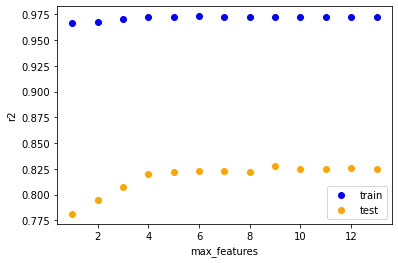

In [89]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
ax.scatter(range(1, 14, 1), train_scores, label='train', color='blue')
ax.scatter(range(1, 14, 1), test_scores, label='test', color='orange')
ax.set_xlabel('max_features')
ax.set_ylabel('r2')
plt.legend(loc='best')